# Chapter 13: Balance Sheet Analysis

This chapter provides a practical framework for analyzing a company's financial health through its balance sheet. We'll examine Apple's (AAPL) financial position by calculating and interpreting three key ratios that reveal critical insights about liquidity and capital structure.

**Data Extraction and Preparation**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tiingo import TiingoClient

# Configure Tiingo API
config = {'session': True, 'api_key': os.getenv('TIINGO_API_KEY', 'YOUR KEY')}
client = TiingoClient(config)

# Define ticker and date range
ticker = "AAPL"
start_date = "2021-01-01"
end_date = "2023-12-31"

# Fetch fundamental data
data = client.get_fundamentals_statements(ticker, startDate=start_date, endDate=end_date, asReported=True)
fundamentals = pd.DataFrame(data)

# Filter for quarterly data only
def filter_quarterly_data(data):
    return data[data['quarter'] != 0]

fundamentals = filter_quarterly_data(fundamentals)

# Function to extract specific statements
def extract_statement(data, statement_type):
    extracted_data = []
    for _, row in data.iterrows():
        if statement_type in row['statementData']:
            statement = row['statementData'][statement_type]
            for item in statement:
                item['date'] = row['date']
                item['ticker'] = ticker
                item['quarter'] = row['quarter']
                extracted_data.append(item)
    return pd.DataFrame(extracted_data)

# Extract and reshape balance sheet data
balance_df = extract_statement(fundamentals, 'balanceSheet')
balance_pivot = balance_df.pivot(index='date', columns='dataCode', values='value').reset_index()

## 13.1 Financial Ratio Calculation and Interpretation

We'll analyze three fundamental ratios that each serve distinct analytical purposes:

In [2]:
# Calculate key financial ratios
balance_pivot['current_ratio'] = balance_pivot['assetsCurrent'] / balance_pivot['liabilitiesCurrent']
balance_pivot['quick_ratio'] = (balance_pivot['assetsCurrent'] - balance_pivot['inventory']) / balance_pivot['liabilitiesCurrent']
balance_pivot['debt_to_equity'] = balance_pivot['totalLiabilities'] / balance_pivot['equity']

# Display results with interpretation guidance
print("AAPL Financial Ratios:")
print(balance_pivot[['date', 'current_ratio', 'quick_ratio', 'debt_to_equity']].dropna())

AAPL Financial Ratios:
dataCode        date  current_ratio  quick_ratio  debt_to_equity
0         2022-04-29       0.926844     0.884023        4.202777
1         2022-07-29       0.864629     0.822796        4.787754
2         2022-10-28       0.879356     0.847235        5.961537
3         2023-02-03       0.938020     0.888343        5.112557
4         2023-05-05       0.940354     0.878043        4.343801
5         2023-08-04       0.981563     0.922737        4.558582
6         2023-11-03       0.988012     0.944442        4.673462


## 13.2 Visualization of Ratios

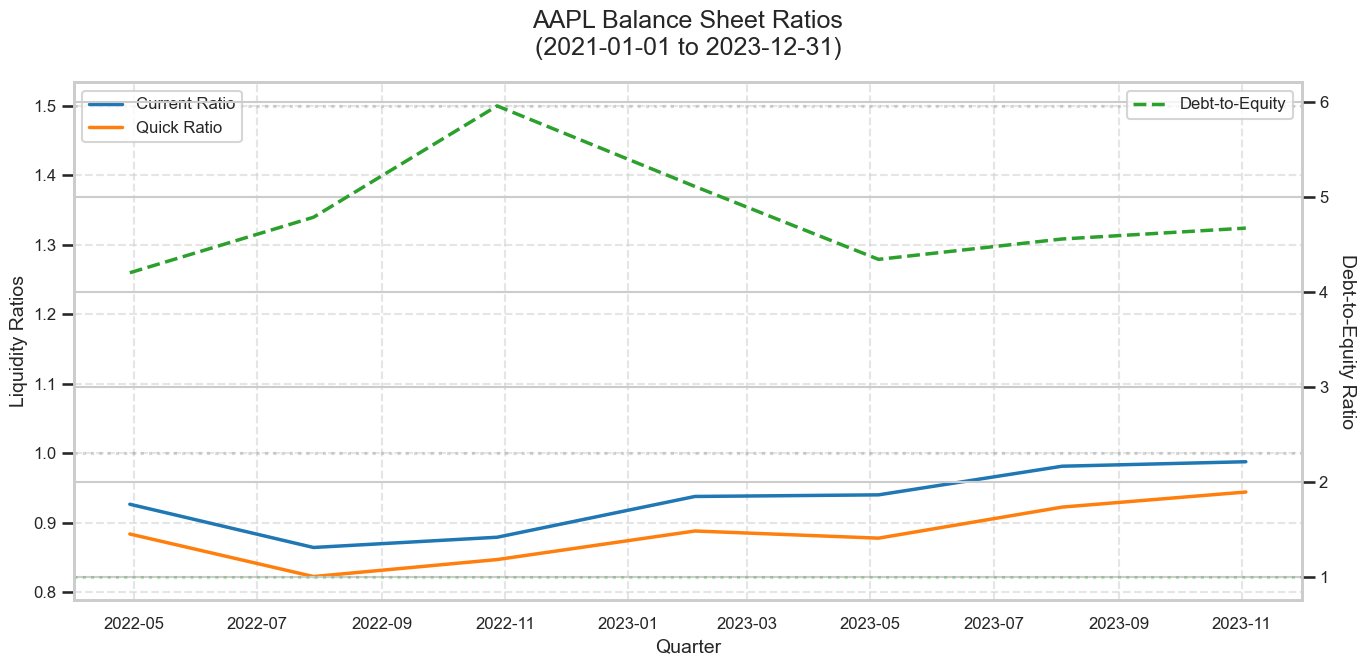

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


if 'date' in balance_pivot.columns:
    balance_pivot['date'] = pd.to_datetime(balance_pivot['date'])
    balance_pivot.set_index('date', inplace=True)
else:
    balance_pivot.index = pd.to_datetime(balance_pivot.index)

# Use Seaborn theme with clean aesthetics
sns.set_theme(style='whitegrid', context='talk')  

# Set custom color palette
palette = {
    'current_ratio': '#1f77b4',     # Blue
    'quick_ratio': '#ff7f0e',       # Orange
    'debt_to_equity': '#2ca02c'     # Green
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 7))

# Plot liquidity ratios
ax.plot(balance_pivot.index, balance_pivot['current_ratio'], label='Current Ratio', color=palette['current_ratio'], linewidth=2.5)
ax.plot(balance_pivot.index, balance_pivot['quick_ratio'], label='Quick Ratio', color=palette['quick_ratio'], linewidth=2.5)

# Plot debt-to-equity on secondary axis
ax2 = ax.twinx()
ax2.plot(balance_pivot.index, balance_pivot['debt_to_equity'], label='Debt-to-Equity', color=palette['debt_to_equity'], linestyle='--', linewidth=2.5)

# Titles and labels
ax.set_title(f'AAPL Balance Sheet Ratios\n({start_date} to {end_date})', fontsize=18, pad=20)
ax.set_xlabel('Quarter', fontsize=14)
ax.set_ylabel('Liquidity Ratios', fontsize=14)
ax2.set_ylabel('Debt-to-Equity Ratio', fontsize=14, rotation=270, labelpad=20)

# Legends
ax.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper right', fontsize=12)

# Add horizontal reference lines
ax.axhline(y=1.5, color='gray', linestyle=':', alpha=0.3)
ax.axhline(y=1.0, color='gray', linestyle=':', alpha=0.3)
ax2.axhline(y=1.0, color=palette['debt_to_equity'], linestyle=':', alpha=0.3)

# Improve grid and spacing
ax.grid(True, which='major', linestyle='--', alpha=0.5)
ax.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

# Final layout
plt.tight_layout()
plt.show()


## 13.3 Summary

This chapter focuses on **Balance Sheet Analysis**, a key component for understanding a company’s financial position. Using historical balance sheet data retrieved through the Tiingo API, the chapter guides you through calculating and interpreting essential financial ratios that offer insights into liquidity, solvency, and leverage.